## **이미지 (Image) 처리 기초**

### **픽셀**

- 이미지 데이터는 픽셀(pixel)이라고 하는 작은 이미지를 직사각형 형태로 모은 것
- 각 픽셀은 단색의 직사각형
- 전체 이미지의 크기를 표현할 때는 (세로픽셀수 x 가로픽셀수) 형식으로 표현
- 이미지 데이터를 저장할 때는 픽셀의 색을 표현하는 스칼라 값이나 벡터를 2차원 배열로 표현

### **색공간**

- 픽셀의 색을 숫자로 표현하는 방식을 색공간(color space)이라고 한다.
- 대표적인 색공간
  - 그레이스케일(gray scale)
  - RGB(Red-Green-Blue)
  - HSV(Hue-Saturation-Value)

### **그레이스케일(gray scale)**

- 그레이스케일에서는 모든 색이 흑백이며, 각 픽셀은 명도를 나타내는 숫자로 표현된다.
- 0은 검은색을 나타내고 숫자가 커질수록 명도가 증가하여 하얀색이 된다.
- 숫자는 보통 0~255의 8비트 부호없는 정수로 저장된다.

In [1]:
# 이미지 처리용 샘플 이미지
import scipy as sp

img_gray = sp.misc.face(gray=True)
img_gray.shape

C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\3354689900.py:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img_gray = sp.misc.face(gray=True)


(768, 1024)

이 이미지 데이터는 768x1024 크기의 uint8 자료형 2차원 배열

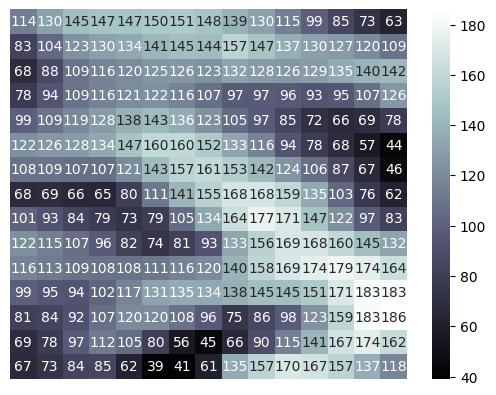

In [2]:
# 샘플 이미지 좌측 상단 225개 픽셀의 데이터
import matplotlib.pylab as plt
import seaborn as sns

sns.heatmap(img_gray[:15, :15], annot=True, fmt="d", cmap=plt.cm.bone)
plt.axis("off")
plt.show()

### **RGB(Red-Green-Blue)**

- RGB 색공간에서 색은 적(Red), 녹(Green), 청(Blue)의 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 벡터로 표현된다.
- 8비트 부호없는 정수를 사용하는 경우 (255, 0, 0)은 빨간색, (0, 255, 0)은 녹색, (0, 0, 255)는 파란색이다.
- 픽셀 데이터가 스칼라가 아닌 벡터이므로 이미지 데이터는 (세로픽셀수 x 가로픽셀수) 형태의 2차원 배열로 표현하지 못하고 (세로픽셀수 x 가로픽셀수 x 색채널) 형태의 3차원 배열로 저장한다.
- 세번째 축을 색채널(channel)이라고 부른다.

In [3]:
from sklearn.datasets import load_sample_images

dataset = load_sample_images()   
img_rgb = dataset.images[1]
img_rgb.shape

(427, 640, 3)

C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45328 (\N{HANGUL SYLLABLE NEOL}) missing from

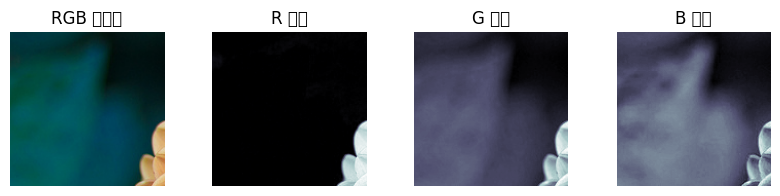

In [46]:
# 다음 그림에서 붉은 기와는 R채널의 값이 크고 하늘은 푸른색이므로 B채널의 값이 큰 것을 확인할 수 있다.
plt.figure(figsize=(10, 2))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB 이미지")

plt.subplot(142)
plt.imshow(img_rgb[50:200, 50:200, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R 채널")

plt.subplot(143)
plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G 채널")

plt.subplot(144)
plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B 채널")

plt.show()

### **HSV(Hue-Saturation-Value)**

- HSV(Hue, Saturation, Value) 색공간에서는 색이 다음 세가지 값으로 표현
  - 색상(Hue): 색상값 H는 가시광선 스펙트럼을 주파수 별로 고리모양으로 배치했을 때의 각도이다. 0°~360°의 범위를 갖고 360°와 0°는 빨강을 가리킨다.
  - 채도(Saturation): 채도값 S는 특정한 색상의 진함의 정도를 나타낸다. 가장 진한 상태를 100%이고 0%는 같은 명도의 무채색이다.
  - 명도(Value): 명도값 V는 밝은 정도를 나타낸다. 순수한 흰색, 빨간색은 100%이고 검은색은 0%이다.

In [6]:
# 채도가 100일 때의 색공간을 시각화 한 것
from matplotlib.colors import hsv_to_rgb
import numpy as np

V, H = np.mgrid[0:1:100j, 0:1:360j]
S = np.ones_like(V)

HSV_S100 = np.dstack((H, S * 1.0, V))
RGB_S100 = hsv_to_rgb(HSV_S100)
HSV_S20 = np.dstack((H, S * 0.2, V))
RGB_S20 = hsv_to_rgb(HSV_S20)

HSV_S20.shape

(100, 360, 3)

In [7]:
# 색상(Hue)
HSV_S20[:4, :5, 0]

array([[0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206]])

In [8]:
# 채도(Saturation)
HSV_S20[:4, :5, 1]

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [9]:
# 명도(Value)
HSV_S20[:4, :5, 2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101],
       [0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202],
       [0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303]])

C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\1936881735.py:15: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\1936881735.py:15: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\1936881735.py:15: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\1936881735.py:15: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\1936881735.py:15: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\1936881735.py:15: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
C:\User

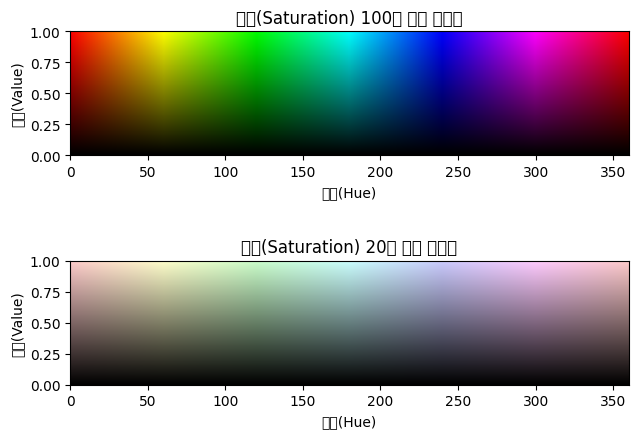

In [10]:
plt.subplot(211)
plt.imshow(RGB_S100, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 100일 때의 색공간")
plt.grid(False)

plt.subplot(212)
plt.imshow(RGB_S20, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 20일 때의 색공간")
plt.grid(False)

plt.tight_layout()
plt.show()

### **이미지 파일 형식**

- .bmp 확장자를 가지는 비트맵(bitmap) 파일은 지금까지 설명한 다차원 배열정보를 그대로 담고있다.
- 하지만 비트맵 파일은 파일 용량이 크기 때문에 압축을 통해 용량을 줄인 JPG, GIF, PNG 등의 압축 파일 형식도 많이 사용한다.
- 각 압축 파일 형식의 장점과 단점은 교재에 나와있으니 참고!

## **Pillow를 이용한 이미지 처리**

- Pillow는 이전에 사용되던 PIL(Python Imaging Library)패키지를 대체하기 위한 것이다.
- JPEG, BPM, GIF, PNG, PPM, TIFF 등의 다양한 포맷을 지원하고 초보자가 다루기 쉽다는 장점
- PIL 패키지의 대체이므로 임포트 이름이 PIL 패키지와 같다.

In [11]:
import PIL
PIL.__version__

'10.1.0'

### **이미지 읽고 쓰기**

- https://curl.se/windows/ 이 주소로 가서 curl 다운로드

In [13]:
# 실습을 위한 이미지 파일
!curl -o "logo.png" "https://www.python.org/static/community_logos/python-logo-master-v3-TM.png"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 83564  100 83564    0     0  1567k      0 --:--:-- --:--:-- --:--:-- 1632k


- Pillow 패키지에서 제공하는 Image 클래스를 사용하면 여러가지 다양한 포맷의 이미지를 읽고 변환하여 저장할 수 있다.
- open 메서드는 이미지 파일을 열 수 있다.

In [14]:
from PIL import Image

img_logo_png = Image.open("./logo.png")
img_logo_png.size

(601, 203)

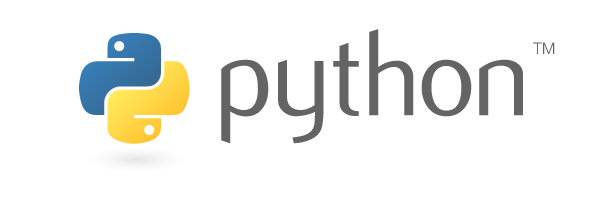

In [15]:
img_logo_png

In [16]:
# 파일로 저장할 때는 save 메서드를 사용, 이 때 확장자를 지정하면 해당 이미지 형식으로 자동 변환하여 저장
img_logo_png.save("./logo.bmp")
img_logo_bmp = Image.open("./logo.bmp")

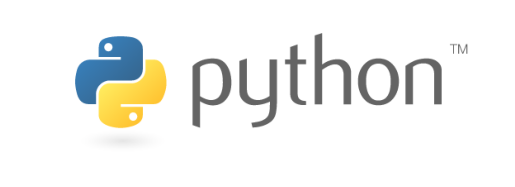

In [18]:
# 이미지 데이터 처리를 위해 Image 클래스 객체를 NumPy 배열로 변환할 때는 np.array 함수를 사용
# NumPy 배열이 되면 matplotlib의 imshow 명령으로 볼 수 있다.

img_logo_array = np.array(img_logo_bmp)

plt.imshow(img_logo_array)
plt.axis("off")
plt.show()

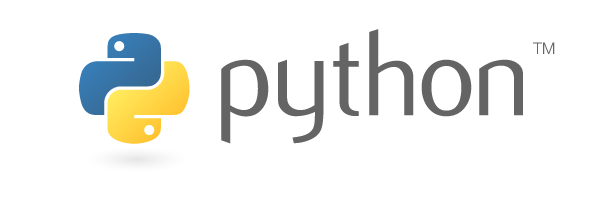

In [19]:
# 반대로 NumPy 배열을 Image 객체로 바꿀 때는 fromarray 클래스 메서드를 사용
Image.fromarray(img_logo_array)

### **이미지 크기 변환**

- 이미지의 크기를 확대 또는 축소하려면 resize 메서드를 사용
- 인수로는 새로운 사이즈의 튜플을 입력
- 썸네일(thumbnail) 이미지를 만들고 싶다면 Image객체의 thumbnail 메서드를 사용
- resize 메서드는 원래 객체는 그대로 유지한 채 변환된 이미지를 반환하지만 thumbnail 메서드는 원래 객체 자체를 바꾸는 인플레이스(in-place) 메소드이므로 주의!

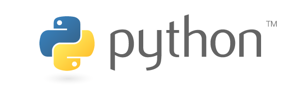

In [20]:
img_logo_png2 = img_logo_png.resize((300, 100))
img_logo_png2

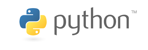

In [21]:
img_logo_thumbnail = img_logo_png.copy()
img_logo_thumbnail.thumbnail((150, 50))
img_logo_thumbnail

### **이미지 회전**

- 이미지를 회전하기 위해서는 rotate 메서드를 호출
- 인수로는 도(degree) 단위의 각도를 입력
- 입력 각도만큼 반시계 방향으로 회전

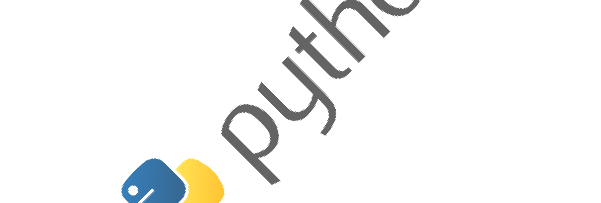

In [22]:
img_logo_rotated = img_logo_png.rotate(45)
img_logo_rotated

### **이미지 잘라내기**

- crop 메서드를 사용하면 이미지에서 우리가 관심이 있는 특정 부분(ROI: region of interest)만 추출 할 수 있다.
- 인수로 ROI의 좌-상의 좌표, 우-하의 좌표를 받는다.
- 아래의 코드는 파이썬 로고이미지에서 파이썬의 마크만 잘라낸 것

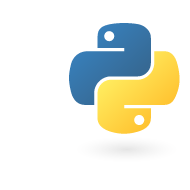

In [23]:
img_logo_cropped = img_logo_png.crop((10, 10, 200, 200))
img_logo_cropped

## **Scikit-Image**

- scikit-image 패키지도 이미지 처리에 많이 사용된다.

### **[ pip install scikit-image ] 터미널에서 실행**

In [24]:
import skimage
skimage.__version__

'0.22.0'

In [25]:
# 샘플 이미지 데이터
import skimage.data

img_astro = skimage.data.astronaut()
img_astro.shape

(512, 512, 3)

### **이미지 읽고 쓰기**

- Scikit-Image 패키지로 이미지를 읽고 쓸 때는 io 서브패키지의 imsave, imread 명령을 사용
- 파일 확장자를 지정하면 해당 이미지 형식으로 자동 변환

In [26]:
skimage.io.imsave("astronaut.png", img_astro)
img_astro2 = skimage.io.imread("astronaut.png")

### **색공간 변환**

- Scikit-Image는 그레이스케일, RGB, HSV 등의 색공간을 변환하는 기능을 color 서브패키지에서 제공

C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from 

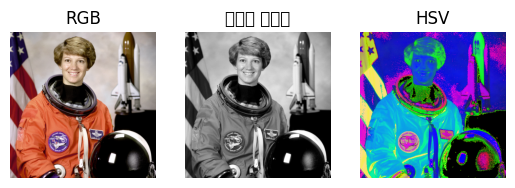

In [27]:
from skimage import color

plt.subplot(131)
plt.imshow(img_astro)
plt.axis("off")
plt.title("RGB")

plt.subplot(132)
plt.imshow(color.rgb2gray(img_astro), cmap=plt.cm.gray)
plt.axis("off")
plt.title("그레이 스케일")

plt.subplot(133)
plt.imshow(color.rgb2hsv(img_astro))
plt.axis("off")
plt.title("HSV")

plt.show()

## **OpenCV**

- OpenCV(Open Source Computer Vision)은 이미지 처리, 컴퓨터 비전을 위한 라이브러리
- Windows, Linux, OS X(Mac OS), iOS, Android 등 다양한 플랫폼을 지원
- 실시간 이미지 프로세싱에 중점을 둔 라이브러리이며 많은 영상처리 알고리즘을 구현해 놓았다.

### **[ pip install opencv-python ] 터미널에서 실행**

In [28]:
import cv2
cv2.__version__

'4.8.1'

### **파일 읽고 쓰기**

- 이미지를 읽을 때는 imread 메서드를 사용하는데 인수로 파일이름과 함께 flag를 넣을 수 있다.
  - cv2.IMREAD_COLOR: 이미지 파일을 컬러로 읽어들인다. 투명한 부분은 무시되며, flag디폴트 값이다.
  - cv2.IMREAD_GRAYSCALE: 이미지를 그레이스케일 읽어 들인다. 실제 이미지 처리시 중간단계로 많이 사용한다.
  - cv2.IMREAD_UNCHANGED: 이미지파일을 알파 채널까지 포함하여 읽어 들인다.
- 각각 1, 0, -1 로도 표현한다.

In [29]:
img_astro3 = cv2.imread("./astronaut.png")
img_astro3.shape

(512, 512, 3)

OpenCV도 이미지 데이터를 NumPy 배열로 저장하지만 색 채널의 순서가 R-G-B 순서가 아니라, B-G-R 순서로 뒤바뀌어 있다는 점에 주의

In [30]:
# 각 채널을 분리
b, g, r = cv2.split(img_astro3)

# b, r을 서로 바꿔서 Merge
img_astro3_rgb = cv2.merge([r, g, b])

In [31]:
# cvtColor 명령을 사용하면 더 간단하게 색공간을 변환할 수도 있다.
img_astro3_gray = cv2.cvtColor(img_astro3, cv2.COLOR_BGR2GRAY)

In [32]:
# 이미지 파일을 만들 때는 imwrite 명령을 사용한다.
cv2.imwrite("./gray_astronaut.png", img_astro3_gray)

True

### **이미지 크기 변환**

- resize() 명령으로 이미지 크기 변환 기능을 제공

C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing fr

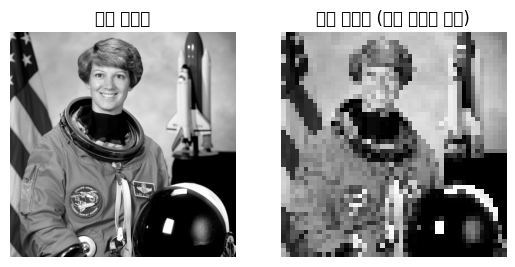

In [33]:
img_astro3_gray_resized = cv2.resize(img_astro3_gray, dsize=(50, 50))
img_astro3_gray_resized.shape

plt.subplot(121)
plt.imshow(img_astro3_gray, cmap=plt.cm.gray)
plt.title("원본 이미지")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_astro3_gray_resized, cmap=plt.cm.gray)
plt.title("축소 이미지 (같은 크기로 표현)")
plt.axis("off")

plt.show()

## **이미지 (Image) 필터링**

- 이미지 필터링은 여러 수식을 이용하여 이미지를 이루고 있는 픽셀 행렬을 다른 값으로 바꾸어 이미지를 변형하는 것

### **임계처리**

- 임계처리(thresholding)는 이미지 행렬에서 하나의 픽셀값을 사용자가 지정한 기준값(threshold)를 사용하여 이진화(binarization)하는 가장 단순한 필터
- OpenCV에서는 threshold라는 함수로 구현
- threshold(src, thresh, maxval, type)

C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\217463001.py:24: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout(pad=0.7)
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\217463001.py:24: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  plt.tight_layout(pad=0.7)
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\217463001.py:24: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout(pad=0.7)
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\217463001.py:24: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  plt.tight_layout(pad=0.7)
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\217463001.py:24: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout(pad=0.7)


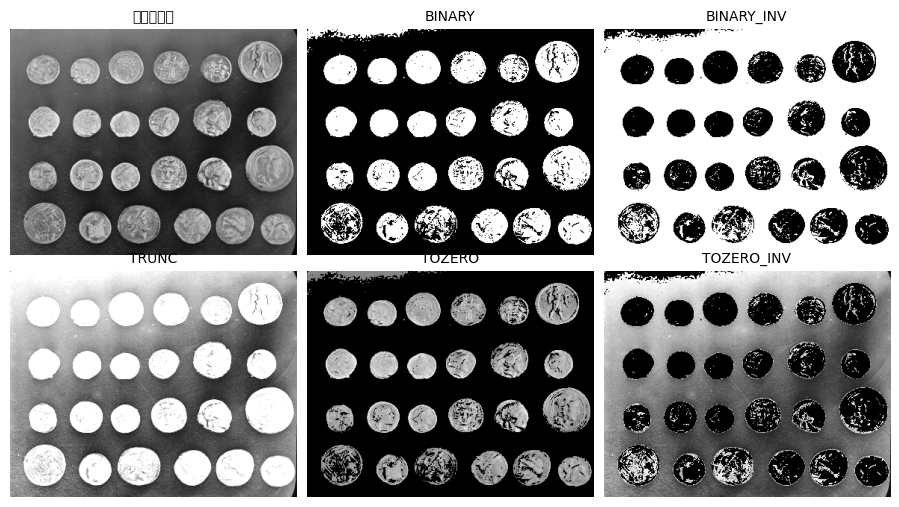

In [34]:
import cv2
from skimage.data import coins

img = coins()

maxval = 255
thresh = maxval / 2

_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

titles = ['원본이미지', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9, 5))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict={'fontsize': 10})
    plt.axis('off')

plt.tight_layout(pad=0.7)
plt.show()

### **적응임계처리**

- 적응임계처리는 일정한 영역 내의 이웃한 픽셀들의 값들을 이용하여 해당 영역에 적용할 기준값을 자체적으로 계산
- OpenCV에서는 adaptiveThreshold 함수로 구현
- adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)

C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\623563009.py:27: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\623563009.py:27: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\623563009.py:27: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\623563009.py:27: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\623563009.py:27: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\623563009.py:27: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData

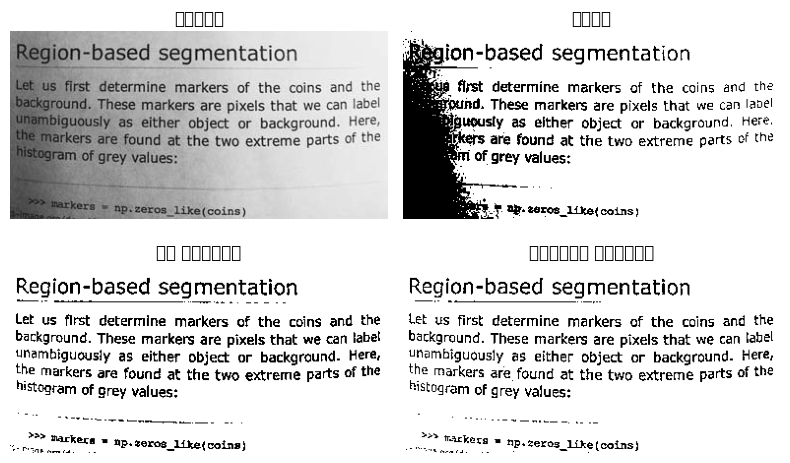

In [35]:
from skimage.data import page

img = page()

maxval = 255
thresh = 126
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

k = 15
C = 20

th2 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, k, C)
th3 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)

images = [img, th1, th2, th3]
titles = ['원본이미지', '임계처리', '평균 적응임계처리', '가우시안블러 적응임계처리']

plt.figure(figsize=(8, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

### **이미지 필터링**

- openCV에서는 filter2D 함수를 사용
- filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])
- 다음 코드는 평균을 구하는 커널 적용한 예다. 커널 크기가 커지면서 이미지가 점점 더 흐려지는 것을 볼 수 있다.

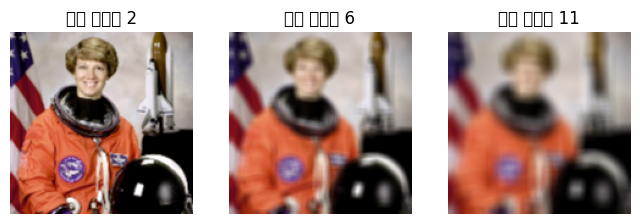

In [37]:
import cv2
from skimage.data import astronaut

img = astronaut()
img = cv2.resize(img, dsize=(150, 150))

plt.figure(figsize=(8, 3))
for i, k in enumerate([2, 6, 11]):
    kernel = np.ones((k, k)) / k**2
    filtering = cv2.filter2D(img, -1, kernel)
    plt.subplot(1, 3, i + 1)
    plt.imshow(filtering)
    plt.title("커널 사이즈 {}".format(k))
    plt.axis("off")

plt.show()

### **블러**

- 블러는 이미지 필터링을 사용하여 이미지를 흐리게 만드는 것
- 노이즈를 제거하거나 경계선을 흐리게 하기 위해 쓴다.
- 평균 블러, 중앙값 블러, 가우시안 블러, 양방향 블러

### **평균 블러**

- 평균 블러 방법은 균일한 값을 가지는 커널을 이용한 이미지 필터링이다.
- 따라서 커널 영역내의 평균값으로 해당 픽셀을 대체
- OpenCV에서는 blur 함수로 구현
- blur(src, ksize)

C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\532301529.py:13: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\532301529.py:13: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\532301529.py:13: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\532301529.py:13: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\532301529.py:13: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\532301529.py:13: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppDat

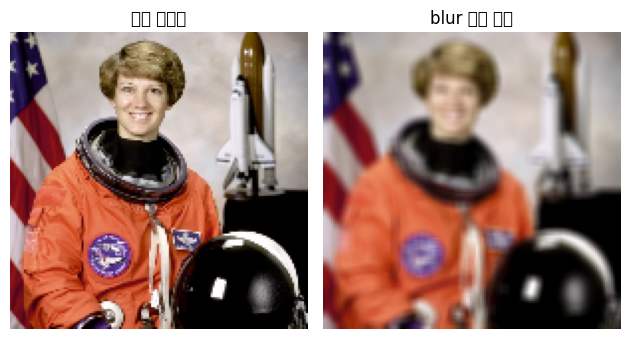

In [38]:
blur = cv2.blur(img, (5, 5))
boxfilter = cv2.boxFilter(img, -1, (5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("원본 이미지")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blur)
plt.title("blur 함수 적용")
plt.axis('off')

plt.tight_layout()
plt.show()

### **중앙값 블러**

- 중앙값 블러는 평균이 아닌 중앙값으로 해당 픽셀을 대체한다.
- 이 필터링 방법은 점 모양의 잡음을 제거하는데 효과적이다.
- OpenCV에서는 medianBlur 함수를 사용
- medianBlur(src, ksize)

C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\박랑희\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing

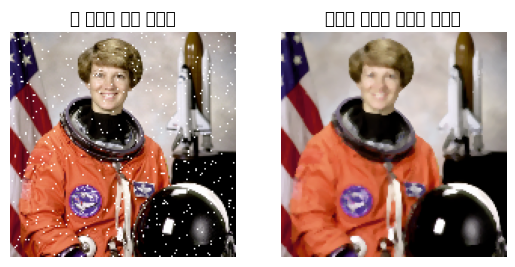

In [39]:
# 점 잡음 적용
img_noise = img.copy()

np.random.seed(0)
N = 500
idx1 = np.random.randint(img.shape[0], size=N)
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1, idx2] = 255

# 중앙값 블러로 잡음 제거
img_denoise = cv2.medianBlur(img_noise, 3)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("점 잡음이 있는 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("중앙값 블러를 적용한 이미지")
plt.axis('off')
plt.show()

### **형태학적 변환**

- 이진화한 이미지에서는 같은 값을 가진 픽셀이 이웃하여 있으면 이를 형태학적 영역(morphological region)으로 생각할 수 있다.
- 이미지의 형태학적 변환(morphological transformation)은 이미지 필터링을 사용하여 영역을 변화시키는 방법이다.
- 변환에 적용할 커널은 getStructuringElement 함수로 생성한다.
- getStructuringElement(shape, ksize)
- shape: 커널 모양

In [47]:
# cv2.MORPH_RECT: 사각형
cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [48]:
# cv2.MORPH_ELLIPSE: 타원형
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [49]:
# cv2.TMORPH_CROSS: 십자
cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### **침식 기법**

- 침식 기법은 각 픽셀에 커널을 적용하여 커널 영역 내의 최솟값으로 해당 픽셀을 대체한다.
- 이진화된 이미지에서는 0인 영역이 증가한다.
- OpenCV에서는 erode함수로 구현
- erode(src, kernel)

- 다음 코드는 이미지를 여러 커널 모양을 이용하여 침식 기법으로 변환
- 검은색이 0인 영역, 흰색이 1인 영역이다.
- 검은색(0)이 흰색을 침식해 들어가는 것을 알 수 있다.

C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\815155409.py:23: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\815155409.py:23: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\815155409.py:23: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\815155409.py:23: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\815155409.py:23: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\815155409.py:23: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData

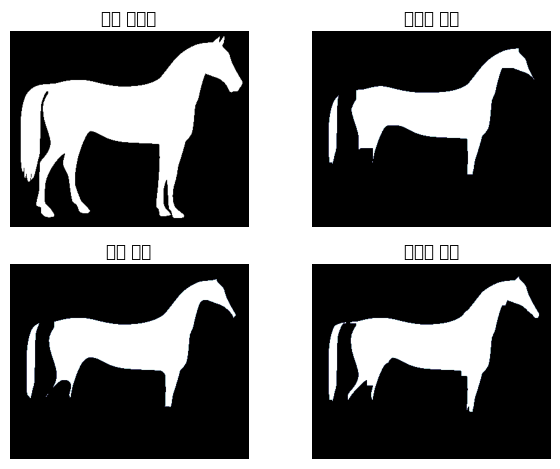

In [43]:
from skimage.data import horse

img = horse().astype('uint8')
img = np.ones(img.shape) - img

ksize = (20, 20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize)
title = ["사각형 커널", "타원 커널", "십자가 커널"]

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("원본 이미지")
plt.axis('off')
for i in range(3):
    erosion = cv2.erode(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

### **팽창**

- 팽창(Dilation)은 침식과 반대로 커널 영역내의 최댓값으로 해당 픽셀을 대체하는 것
- OpenCV에서는 dilate 함수로 구현
- dilate(src, kernel)

C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\1008527782.py:11: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\1008527782.py:11: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\1008527782.py:11: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\1008527782.py:11: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\1008527782.py:11: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\1008527782.py:11: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\A

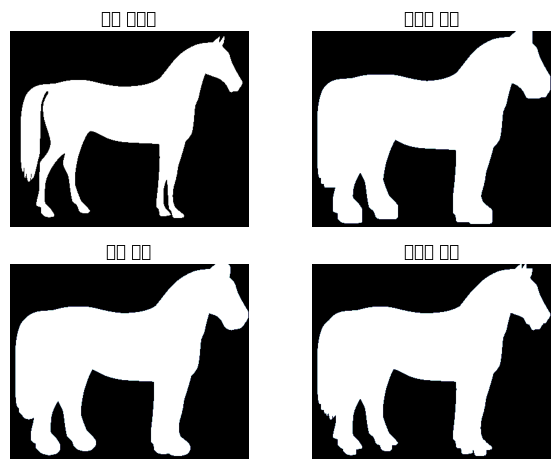

In [44]:
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("원본 이미지")
plt.axis('off')
for i in range(3):
    erosion = cv2.dilate(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

### **그레디언트, 오프닝, 클로징**

- 그레디언트는 팽창으로 확장시킨 영역에서 침식으로 축소시킨 영역을 빼서 윤곽선을 파악하는 것
- 오프닝은 침식을 적용한 뒤 팽창을 적용하는 것으로 영역이 점점 둥글게 되므로 점 잡음, 작은 물체, 돌기 등을 제거하는데 적합
- 클로징은 반대로 팽창을 적용한 뒤 침식을 적용하여 영역이 영역이 붙기 때문에 전체적인 윤곽을 파악하는데 적합

C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\2159937738.py:22: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\2159937738.py:22: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\2159937738.py:22: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\2159937738.py:22: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  plt.tight_layout()
C:\Users\박랑희\AppData\Local\Temp\ipykernel_82016\2159937738.py:22: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()


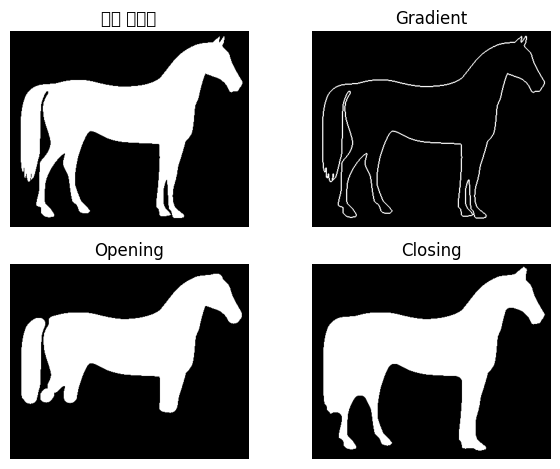

In [45]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
)

images = [img, gradient, opening, closing]
titles = ["원본 이미지", 'Gradient', 'Opening', 'Closing']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()